In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 폰트 설정용

# 폰트 설정 (Mac/Windows에 따라 경로 다를 수 있음)
# Windows 사용자:
plt.rcParams['font.family'] = 'Malgun Gothic'
# Mac 사용자:
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

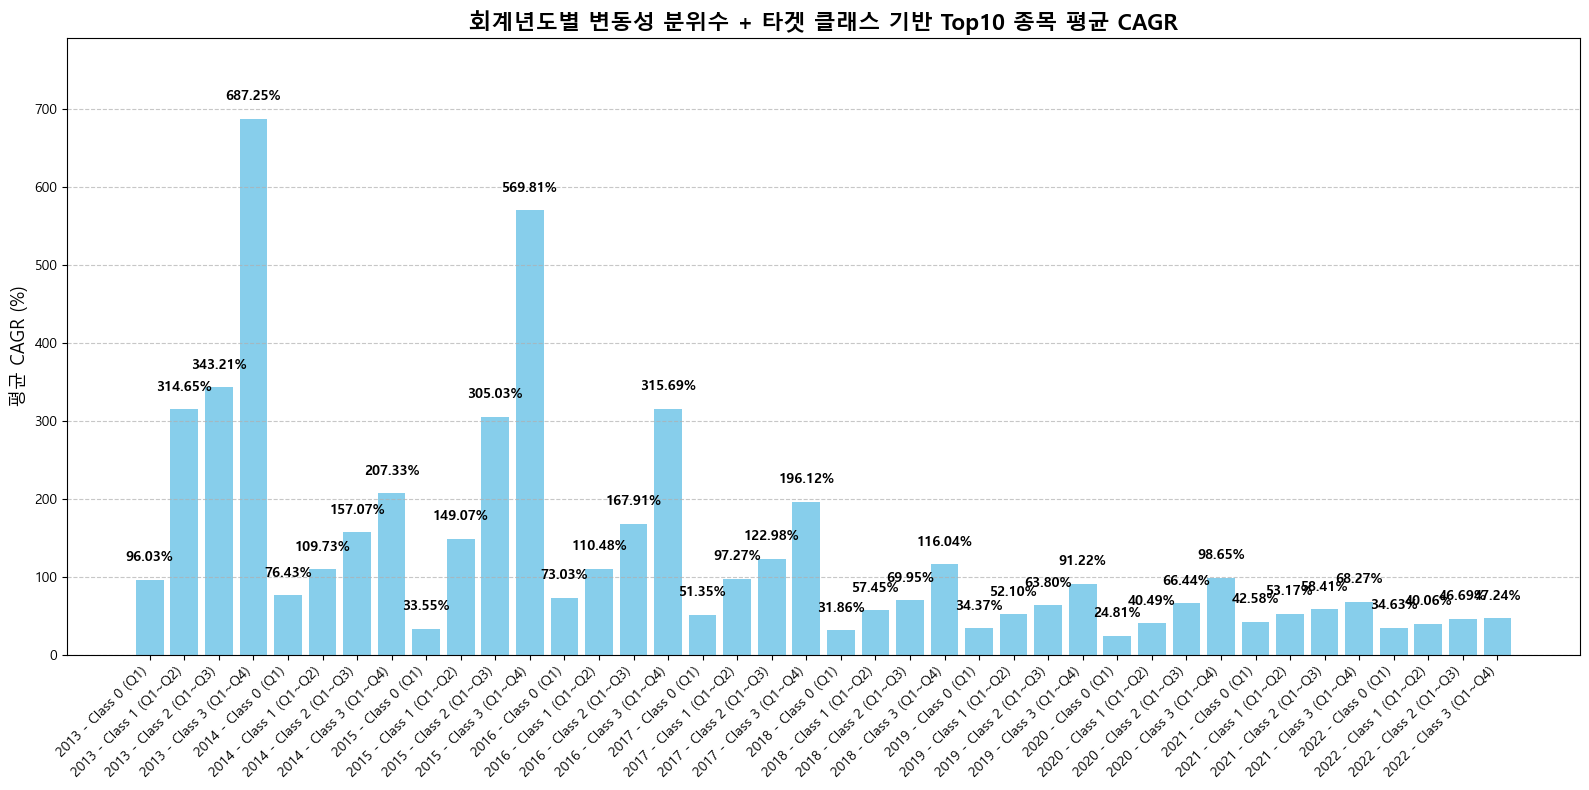


             추천 종목 상세 정보

[2013 - Class 0 (Q1)]
  평균 CAGR: 96.03%
  추천 종목:
    1. 이엠코리아(주)
    2. 오상자이엘(주)
    3. 엔피씨(주)
    4. (주)지에스홈쇼핑
    5. 조광피혁(주)
    6. 한국쉘석유(주)
    7. 코리아에프티(주)
    8. (주)부산도시가스
    9. (주)나이스홀딩스
    10. (주)진로발효

[2013 - Class 1 (Q1~Q2)]
  평균 CAGR: 314.65%
  추천 종목:
    1. 엘컴텍(주)
    2. (주)위메이드플레이
    3. 네이버(주)
    4. (주)하림홀딩스
    5. (주)한샘
    6. 나이스정보통신(주)
    7. (주)신진에스엠
    8. 피에스케이홀딩스(주)
    9. (주)제우스
    10. 이엠코리아(주)

[2013 - Class 2 (Q1~Q3)]
  평균 CAGR: 343.21%
  추천 종목:
    1. 엘컴텍(주)
    2. (주)위메이드플레이
    3. (주)에이프로젠
    4. 네이버(주)
    5. (주)모베이스전자
    6. (주)휴온스글로벌
    7. (주)하림홀딩스
    8. (주)일지테크
    9. (주)한샘
    10. 나이스정보통신(주)

[2013 - Class 3 (Q1~Q4)]
  평균 CAGR: 687.25%
  추천 종목:
    1. 엘컴텍(주)
    2. (주)주성코퍼레이션
    3. 남광토건(주)
    4. (주)광무
    5. (주)대양금속
    6. 금호건설(주)
    7. (주)녹십자셀
    8. (주)위메이드플레이
    9. 대한해운(주)
    10. (주)에이프로젠

[2014 - Class 0 (Q1)]
  평균 CAGR: 76.43%
  추천 종목:
    1. 조광피혁(주)
    2. 아이에스동서(주)
    3. 에스지씨이앤씨(주)
    4. (주)서흥
    5. (주)동원개발


In [ ]:
df = pd.read_excel('이거진짜마지막데이터셋.xlsx')

# '회사명' 컬럼이 있는지 확인. 만약 '회사명'이 없다면 실제 회사명 컬럼 이름으로 바꿔주세요.
# 예: df['회사명'] 또는 df['티커'] 등
if '회사명' not in df.columns:
    print("경고: '회사명' 컬럼을 찾을 수 없습니다. 실제 회사명을 나타내는 컬럼으로 수정해주세요.")
    # 예시로 '회사명'이 있다면 '회사명'으로 대체
    # df['회사명'] = df['회사명'] # 또는 다른 적절한 컬럼
    # 이 부분은 실제 데이터셋에 맞춰서 수정해야 합니다.

# 분위수 계산
df['vol_quartile'] = pd.qcut(df['연간변동성'], q=4, labels=[1, 2, 3, 4])
df['vol_quartile'] = df['vol_quartile'].astype(int)

# 결과 저장용 딕셔너리 (CAGR과 종목 리스트를 함께 저장)
results = {}

# 연도별로 반복
for year in sorted(df['회계년도'].unique()):
    df_year = df[df['회계년도'] == year]

    # 조건 정의 (연도별 DataFrame에 대해서 조건 생성)
    conditions = {
        'Class 0 (Q1)': (
            (df_year['target_class'] == 0) &
            (df_year['vol_quartile'] == 1)
        ),
        'Class 1 (Q1~Q2)': (
            (df_year['target_class'].isin([0, 1])) &
            (df_year['vol_quartile'].isin([1, 2]))
        ),
        'Class 2 (Q1~Q3)': (
            (df_year['target_class'].isin([0, 1, 2])) &
            (df_year['vol_quartile'].isin([1, 2, 3]))
        ),
        'Class 3 (Q1~Q4)': (
            (df_year['target_class'].isin([0, 1, 2, 3])) &
            (df_year['vol_quartile'].isin([1, 2, 3, 4]))
        ),
    }

    # 조건별 CAGR 상위 10개 평균 계산
    for label, condition in conditions.items():
        key = f"{year} - {label}"
        top10_cagr_df = df_year[condition].sort_values(by='CAGR', ascending=False).head(10)

        mean_cagr = top10_cagr_df['CAGR'].mean()
        # 추천된 회사명 리스트 추출 (NaN 값은 제외)
        # '회사명' 컬럼이 실제 데이터에 맞게 수정되었는지 다시 확인하세요!
        recommended_stocks = top10_cagr_df['회사명'].dropna().tolist()

        # 딕셔너리에 평균 CAGR과 추천 종목 리스트를 함께 저장
        results[key] = {
            'mean_cagr': mean_cagr,
            'recommended_stocks': recommended_stocks
        }

# 시각화
plt.figure(figsize=(16, 8)) # 차트 크기 약간 키움
bar_labels = list(results.keys())
bar_values = [data['mean_cagr'] for data in results.values()]

bars = plt.bar(bar_labels, bar_values, color='skyblue')
plt.title("회계년도별 변동성 분위수 + 타겟 클래스 기반 Top10 종목 평균 CAGR", fontsize=16, fontweight='bold')
plt.ylabel("평균 CAGR (%)", fontsize=13) # y축 레이블에 단위 추가

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    if pd.isna(yval): # NaN 값인 경우 (조건에 맞는 종목이 없는 경우 등)
        text_to_display = "N/A"
    else:
        text_to_display = f'{yval:.2f}%' # 백분율 기호만 붙임 (100을 곱하지 않음)
    
    # CAGR 값이 클 경우 텍스트가 막대에 겹치지 않도록 적절한 오프셋 조정
    text_offset = max(20, yval * 0.02) if not pd.isna(yval) else 0 # 최소 20 또는 막대 높이의 2%
    
    plt.text(bar.get_x() + bar.get_width()/2, yval + text_offset,
             text_to_display, ha='center', va='bottom', fontsize=10,
             color='black', fontweight='bold') # 텍스트 가독성을 위해 색상 및 굵기 추가

plt.xticks(rotation=45, ha='right', fontsize=10) # x축 레이블 회전 및 폰트 크기 조정
plt.yticks(fontsize=10) # y축 레이블 폰트 크기 조정
plt.ylim(0, max(bar_values) * 1.15 if bar_values else 100) # y축 범위 조정 (텍스트 공간 확보)
plt.grid(axis='y', linestyle='--', alpha=0.7) # 그리드 추가
plt.tight_layout()
plt.show()

# --- 추천 종목 상세 정보 출력 ---
print("\n" + "="*50)
print("             추천 종목 상세 정보")
print("="*50)

for key, data in results.items():
    print(f"\n[{key}]")
    mean_cagr = data['mean_cagr']
    recommended_stocks = data['recommended_stocks']

    if pd.isna(mean_cagr):
        print(f"  평균 CAGR: N/A (해당 조건에 맞는 종목이 없습니다.)")
    else:
        print(f"  평균 CAGR: {mean_cagr:.2f}%")

    print("  추천 종목:")
    if recommended_stocks:
        for i, stock in enumerate(recommended_stocks):
            print(f"    {i+1}. {stock}")
    else:
        print("    해당 조건에 맞는 종목이 없습니다.")
print("\n" + "="*50)